# Statistics on the datasets

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Literal
from pathlib import Path
import seaborn as sns

import matplotlib as mpl
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import scipy

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'


In [2]:
# Settings

# Path to resource folder with the structures and metadata tables
path_resources = Path(r"D:\Eigene Datein\dev\Uni\JGU Bio Bachelorthesis\Daten\resources")

path_AF2 = path_resources / "AF2"
path_AF3 = path_resources / "AF3"
path_solved = path_resources / "solved"

In [3]:
dataAF2 = pd.read_csv(path_AF2 / "AF2_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF2.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF2[c] = dataAF2[c].astype(pd.Int64Dtype())
display(dataAF2)

,project_name,run_id,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom,DockQ,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,salt_bridges,hbonds,hydrophobic_interactions
0,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,312,5,A,B,165,...,0.976244,0.878344,0.603831,1.575394,0.086957,662.104,6.072,0,10,3
1,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,312,5,A,B,165,...,0.979658,0.880716,0.418230,1.100588,0.050000,613.651,6.063,0,9,0
2,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,312,5,A,B,165,...,0.969753,0.883186,0.641834,1.776257,0.185185,323.304,5.092,0,2,9
3,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,312,5,A,B,165,...,1.260424,0.475511,1.686332,5.358800,0.363636,853.680,5.658,11,12,6
4,AlphaFold_benchmark,run37,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,312,5,A,B,165,...,1.759591,0.223400,2.928606,9.908745,0.888889,851.771,5.691,9,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,60,113,B,B,392,...,5.341712,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3176,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,60,113,B,B,392,...,5.975135,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3177,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,60,113,B,B,392,...,5.962444,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3178,AlphaFold_benchmark_DDI,run6,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,60,113,B,B,392,...,5.901696,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>


In [4]:
dataAF3 = pd.read_csv(path_AF3 / "AF3_metrics.tsv", sep="\t")
for c in ["chainA_start", "chainA_end", "chainB_start", "chainB_end", "num_mutations", "num_align_atoms_domain", "num_align_resi_domain", "hbonds", "salt_bridges", "hydrophobic_interactions"]:
    if c not in dataAF3.columns:
        print(f"Column {bcolors.FAIL}{c}{bcolors.ENDC} not (yet) in data frame")
        continue
    dataAF3[c] = dataAF3[c].astype(pd.Int64Dtype())
display(dataAF3)

,model_preset,benchmark_set,prediction_name,model_id,ranking_score,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,DockQ,iRMSD,LRMSD,Fnonnat,buried_area,min_distance,salt_bridges,hbonds,hydrophobic_interactions,ipSAE
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.967617,0.341276,0.831159,0.000000,848.152,5.371,9,0,6,0.869025
1,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,0.97,312,5,A,B,165,...,0.943274,0.426121,1.169542,0.076923,603.522,6.264,0,0,0,0.868551
2,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,0.96,312,5,A,B,165,...,0.908970,0.621263,1.944753,0.111111,602.041,6.241,0,0,0,0.855837
3,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,0.96,312,5,A,B,165,...,0.961964,0.382246,1.037074,0.038462,615.163,6.207,0,0,0,0.850758
4,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,0.96,312,5,A,B,165,...,0.931179,0.573091,1.749101,0.074074,662.502,5.890,0,0,0,0.850449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,0.36,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1447.877,4.251,1,0,19,0.012324
3176,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,0.23,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1482.311,4.197,1,0,25,0.000000
3177,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,0.22,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1564.435,4.783,2,0,18,0.000000
3178,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,0.21,60,113,B,B,392,...,NaN,NaN,NaN,NaN,1431.933,4.257,0,0,59,0.000000


In [5]:
dataSolved = pd.read_csv(path_solved / "solved_metrics.tsv", sep="\t")
display(dataSolved)

,set,PDB_id,DDI_pfam_id,path,chainA_id,chainB_id,min_distance,buried_area,salt_bridges,hbonds,hydrophobic_interactions
0,DMI,1ATP,NaN,DMI\1ATP_min_DMI.pdb,A,B,6.273,808.592,0,0,77
1,DMI,1AXC,NaN,DMI\1AXC_min_DMI.pdb,A,B,4.174,1209.332,0,4,62
2,DMI,1B72,NaN,DMI\1B72_min_DMI.pdb,A,B,5.182,547.149,0,0,36
3,DMI,1B8Q,NaN,DMI\1B8Q_min_DMI.pdb,A,B,4.376,871.756,0,4,42
4,DMI,1BXX,NaN,DMI\1BXX_min_DMI.pdb,A,B,4.435,783.465,0,0,19
...,...,...,...,...,...,...,...,...,...,...,...
183,DDI,3ZNI,PF14447_PF00179,DDI\PF14447_PF00179_3ZNI_AC.pdb,A,C,5.268,1288.881,0,0,85
184,DDI,3J7Y,PF14978_PF00327,DDI\PF14978_PF00327_3J7Y_oZ.pdb,o,Z,4.885,2488.556,0,0,70
185,DDI,6D6Q,PF15985_PF10175,DDI\PF15985_PF10175_6D6Q_GL.pdb,G,L,3.891,3659.160,2,0,167
186,DDI,3KZ1,PF17838_PF00071,DDI\PF17838_PF00071_3KZ1_BE.pdb,B,E,5.276,1249.398,2,0,60


In [6]:
dataAF = pd.merge(
    left=dataAF3,
    right=dataAF2,
    left_on=["benchmark_set", "prediction_name", "model_id"],
    right_on=["benchmark_set", "prediction_name", "model_id"],
    suffixes=["_AF3", "_AF2"],
    how="inner"
)
for c in ["chainA_length", "chainB_length", "chainA_id", "chainB_id", "chainA_start", "chainA_end", "chainB_start", "chainB_end", "PDB_id", "ELM_instance", "DDI_pfam_id", "PDB_id_random_paired", "ELM_instance_random_paired", "DDI_pfam_id_random_paired", "sequence_initial", "sequence_mutated", "num_mutations"]:
    if len(dataAF[~(dataAF[c+"_AF2"] == dataAF[c+"_AF3"]) & (~dataAF[c+"_AF2"].isna()) & (~dataAF[c+"_AF3"].isna())]) > 0:
        print(f"Unmatched column {c}")
        continue
    dataAF.drop(columns=[c+"_AF2"], inplace=True)
    dataAF.rename(columns={c+"_AF3": c}, inplace=True)
dataAF.rename(columns={"ranking_score": "ranking_score_AF3"}, inplace=True)
dataAF.rename(columns={"model_confidence": "model_confidence_AF2"}, inplace=True)
dataAF.rename(columns={"ipSAE": "ipSAE_AF3"}, inplace=True)

display(dataAF)

,model_preset,benchmark_set,prediction_name,model_id,ranking_score_AF3,chainA_length,chainB_length,chainA_id,chainB_id,chainA_start,...,RMSD_all_atom_AF2,DockQ_AF2,iRMSD_AF2,LRMSD_AF2,Fnonnat_AF2,buried_area_AF2,min_distance_AF2,salt_bridges_AF2,hbonds_AF2,hydrophobic_interactions_AF2
0,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_0,0.97,312,5,A,B,165,...,0.976244,0.878344,0.603831,1.575394,0.086957,662.104,6.072,0,10,3
1,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_1,0.97,312,5,A,B,165,...,0.979658,0.880716,0.418230,1.100588,0.050000,613.651,6.063,0,9,0
2,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_2,0.96,312,5,A,B,165,...,0.969753,0.883186,0.641834,1.776257,0.185185,323.304,5.092,0,2,9
3,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_3,0.96,312,5,A,B,165,...,1.260424,0.475511,1.686332,5.358800,0.363636,853.680,5.658,11,12,6
4,alphafold3,known_DMI,DEG_APCC_KENBOX_2_4GGD,ranked_4,0.96,312,5,A,B,165,...,1.759591,0.223400,2.928606,9.908745,0.888889,851.771,5.691,9,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0,0.36,60,113,B,B,392,...,5.341712,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3166,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1,0.23,60,113,B,B,392,...,5.975135,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3167,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2,0.22,60,113,B,B,392,...,5.962444,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
3168,alphafold3,random_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3,0.21,60,113,B,B,392,...,5.901696,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>


In [7]:
# Stop code. Intended to raise an Exception to stop the execution when using Jupyters "Run All" function
raise Exception("STOP")

Exception: STOP

## 1 ROC Curve statistics

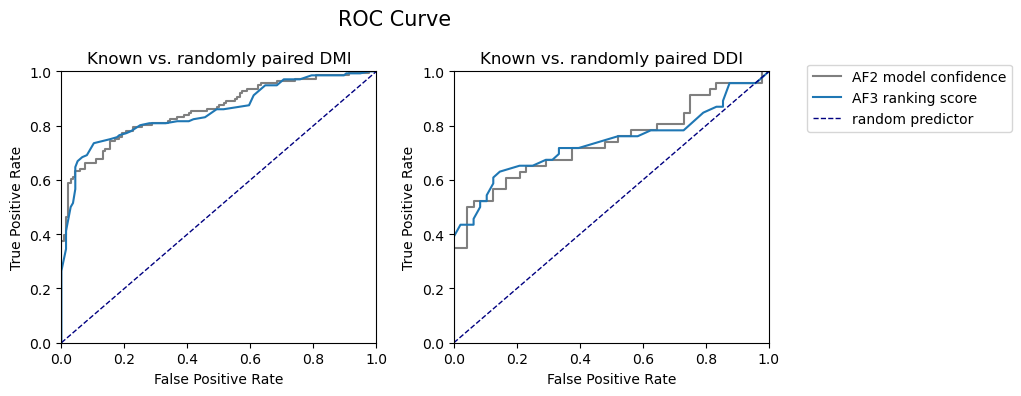

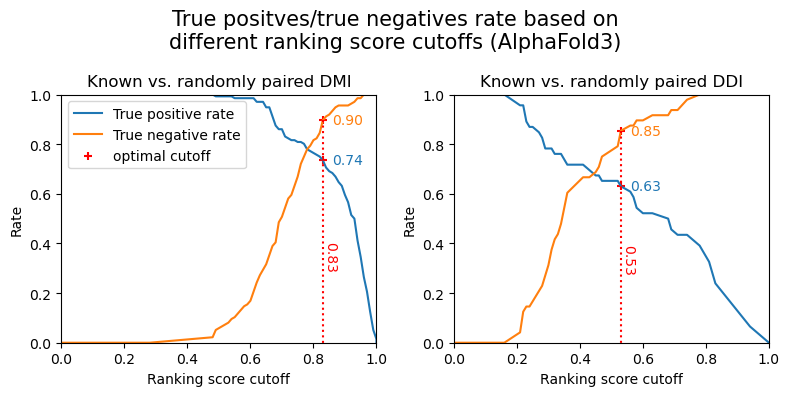

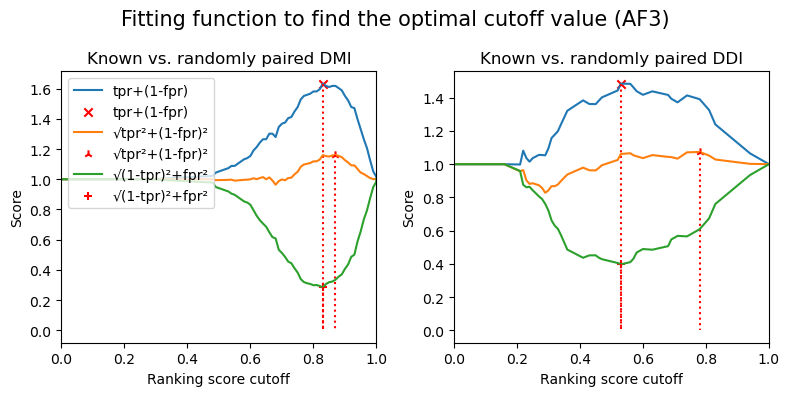

In [24]:
af_v: Literal["AF2", "AF3"] = "AF3"
confidence_column = "model_confidence_AF2" if af_v=="AF2" else "ranking_score_AF3"

rows_trues = [
    dataAF[(dataAF["benchmark_set"] == "known_DMI")], 
    dataAF[(dataAF["benchmark_set"] == "known_DDI")]
]
rows_falses = [
    dataAF[(dataAF["benchmark_set"] == "random_DMI")], 
    dataAF[(dataAF["benchmark_set"] == "random_DDI")]
]
rows_trues = [df[df["model_id"] == "ranked_0"] for df in rows_trues]
rows_falses = [df[df["model_id"] == "ranked_0"] for df in rows_falses]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig: Figure
fig.suptitle("ROC Curve", fontsize=15)
axes: list[Axes] = list(axes)

axes[0].set_title("Known vs. randomly paired DMI")
axes[1].set_title("Known vs. randomly paired DDI")


for ax, rows_true, rows_false in zip(axes, rows_trues, rows_falses):
    x_true, x_false =  rows_true["model_confidence_AF2"].dropna(), rows_false["model_confidence_AF2"].dropna()
    y_score = list(x_true) +  list(x_false)
    y_true = [1]*len(x_true) + [0]*len(x_false)
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
    ax.plot(fpr, tpr, label="AF2 model confidence", color="tab:gray")

    #ax.text(0.02,0.97, "n = %i" % (len(x_true)), transform = ax.transAxes, verticalalignment="top", fontsize=10)

    x_true, x_false =  rows_true["ranking_score_AF3"].dropna(), rows_false["ranking_score_AF3"].dropna()
    y_score = list(x_true) +  list(x_false)
    y_true = [1]*len(x_true) + [0]*len(x_false)
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
    ax.plot(fpr, tpr, label="AF3 ranking score", color="tab:blue")


    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

fig.tight_layout()
axes[1].legend(bbox_to_anchor=(1.1, 1.05))
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig: Figure
if af_v == "AF2":
    fig.suptitle("True positves/true negatives rate based on\ndifferent model confidence cutoffs (AlphaFold2)", fontsize=15)
else:
    fig.suptitle("True positves/true negatives rate based on\ndifferent ranking score cutoffs (AlphaFold3)", fontsize=15)

axes: list[Axes] = list(axes)

axes[0].set_title("Known vs. randomly paired DMI")
axes[1].set_title("Known vs. randomly paired DDI")

for ax, rows_true, rows_false in zip(axes, rows_trues, rows_falses):
    column = "model_confidence_AF2" if af_v == "AF2" else "ranking_score_AF3"
    x_true, x_false =  rows_true[column].dropna(), rows_false[column].dropna()
    y_score = list(x_true) +  list(x_false)
    y_true = [1]*len(x_true) + [0]*len(x_false)
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
    thresholds = np.nan_to_num(thresholds, posinf=1)
    fpr, tpr, thresholds = np.append(fpr, 1), np.append(tpr, 1), np.append(thresholds, 0)
    ax.plot(thresholds, tpr, label="True positive rate")
    ax.plot(thresholds, (1-fpr), label="True negative rate")

    th_curve = np.sqrt((1-tpr)**2+fpr**2)
    th_optimal_index = np.argmin(th_curve)
    th_optimal = thresholds[th_optimal_index]
    ax.scatter([th_optimal], [max(tpr[th_optimal_index], (1-fpr)[th_optimal_index])], marker="+", c="red", label="optimal cutoff")
    ax.scatter([th_optimal], [min(tpr[th_optimal_index], (1-fpr)[th_optimal_index])], marker="+", c="red")
    ax.plot([th_optimal, th_optimal], [max(tpr[th_optimal_index], (1-fpr)[th_optimal_index]), 0], c="red", linestyle="dotted")
    ax.annotate(f"{th_optimal:1.2f}", (th_optimal, max(tpr[th_optimal_index], (1-fpr)[th_optimal_index])/3), rotation=-90, c="red")

    ax.annotate(f"{tpr[th_optimal_index]:1.2f}", (th_optimal+0.03, tpr[th_optimal_index]), c="tab:blue", verticalalignment="center")
    ax.annotate(f"{(1-fpr)[th_optimal_index]:1.2f}", (th_optimal+0.03, (1-fpr)[th_optimal_index]), c="tab:orange", verticalalignment="center")

    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    if af_v == "AF2":
        ax.set_xlabel('model confidence cutoff')
    else:
        ax.set_xlabel('Ranking score cutoff')
    
    ax.set_ylabel('Rate')

fig.tight_layout()
axes[0].legend(loc="upper left")
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
fig: Figure
fig.suptitle(f"Fitting function to find the optimal cutoff value ({af_v})", fontsize=15)
axes: list[Axes] = list(axes)

axes[0].set_title("Known vs. randomly paired DMI")
axes[1].set_title("Known vs. randomly paired DDI")

for ax, rows_true, rows_false in zip(axes, rows_trues, rows_falses):
    column = "model_confidence_AF2" if af_v == "AF2" else "ranking_score_AF3"
    x_true, x_false =  rows_true[column].dropna(), rows_false[column].dropna()
    y_score = list(x_true) +  list(x_false)
    y_true = [1]*len(x_true) + [0]*len(x_false)
    fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
    thresholds = np.nan_to_num(thresholds, posinf=1)
    fpr, tpr, thresholds = np.append(fpr, 1), np.append(tpr, 1), np.append(thresholds, 0)
    
    th_curve = tpr+(1-fpr)
    th_optimal_index = np.argmax(th_curve)
    th_optimal = thresholds[th_optimal_index]
    ax.plot(thresholds, th_curve, label="tpr+(1-fpr)")
    ax.scatter([th_optimal], [th_curve[th_optimal_index]], marker="x", c="red", label="tpr+(1-fpr)")
    ax.plot([th_optimal, th_optimal], [th_curve[th_optimal_index], 0], c="red", linestyle="dotted")

    th_curve = np.sqrt(tpr**2+(1-fpr)**2)
    th_optimal_index = np.argmax(th_curve)
    th_optimal = thresholds[th_optimal_index]
    ax.plot(thresholds, th_curve, label="√tpr²+(1-fpr)²")
    ax.scatter([th_optimal], [th_curve[th_optimal_index]], marker="2", c="red", label="√tpr²+(1-fpr)²")
    ax.plot([th_optimal, th_optimal], [th_curve[th_optimal_index], 0], c="red", linestyle="dotted")
    
    th_curve = np.sqrt((1-tpr)**2+(fpr)**2)
    th_optimal_index = np.argmin(th_curve)
    th_optimal = thresholds[th_optimal_index]
    ax.plot(thresholds, th_curve, label="√(1-tpr)²+fpr²")
    ax.scatter([th_optimal], [th_curve[th_optimal_index]], marker="+", c="red", label="√(1-tpr)²+fpr²")
    ax.plot([th_optimal, th_optimal], [th_curve[th_optimal_index], 0], c="red", linestyle="dotted")

    ax.set_xlim([0,1])
    if af_v == "AF2":
        ax.set_xlabel('model confidence cutoff')
    else:
        ax.set_xlabel('Ranking score cutoff')
    ax.set_ylabel('Score')

fig.tight_layout()
axes[0].legend(loc="upper left")
plt.show()